# Setup

In [1]:
#python >=3.5 is required
import sys
assert sys.version_info >= (3,5)

#scikit-learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#common imports
import numpy as np
import os

#to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)


#where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "food_production"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
    print("saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)    


# Data

In [2]:
import pandas as pd

food = pd.read_csv("FAO.csv")

# take a quick look at the data structure

In [3]:
food.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [5]:
food["Area"].value_counts()

Spain              150
Italy              148
Germany            147
China, mainland    146
Greece             143
                  ... 
Guinea-Bissau       91
Turkmenistan        90
Timor-Leste         86
Afghanistan         83
Lesotho             75
Name: Area, Length: 174, dtype: int64

In [6]:
food.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


# Variety of items produced

saving figure Countries ranked by variety of items produced


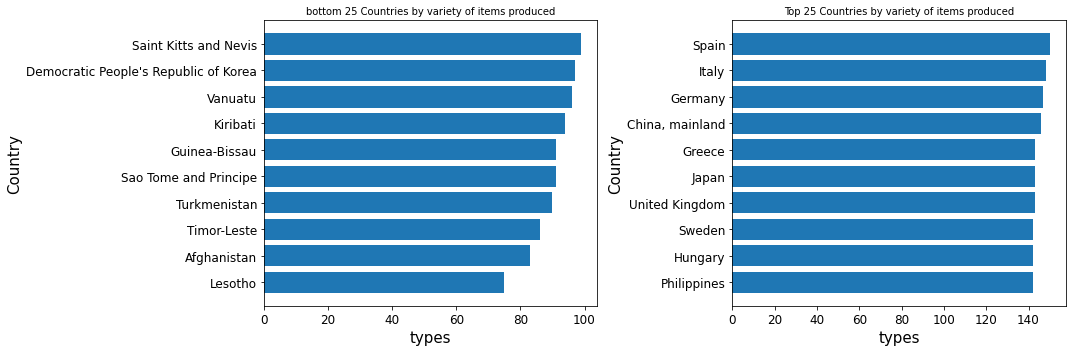

In [7]:
country_counts =(food['Area'].value_counts()).sort_values(ascending=True)
plt.figure(figsize=(15, 5))
#bottom 25 Countries by variety of items produced
plt.subplot(1, 2, 1)
plt.xlabel('types',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.title('bottom 25 Countries by variety of items produced',fontsize=10)
plt.barh(country_counts.index[:10],country_counts.values[:10])

#Top 25 Countries by variety of items produced
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.5)
plt.xlabel('types',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.title('Top 25 Countries by variety of items produced',fontsize=10)
plt.barh(country_counts.index[-10:],country_counts.values[-10:])
save_fig("Countries ranked by variety of items produced")

plt.show()

# Food vs Feed production over the years

saving figure production of food and feed over the years


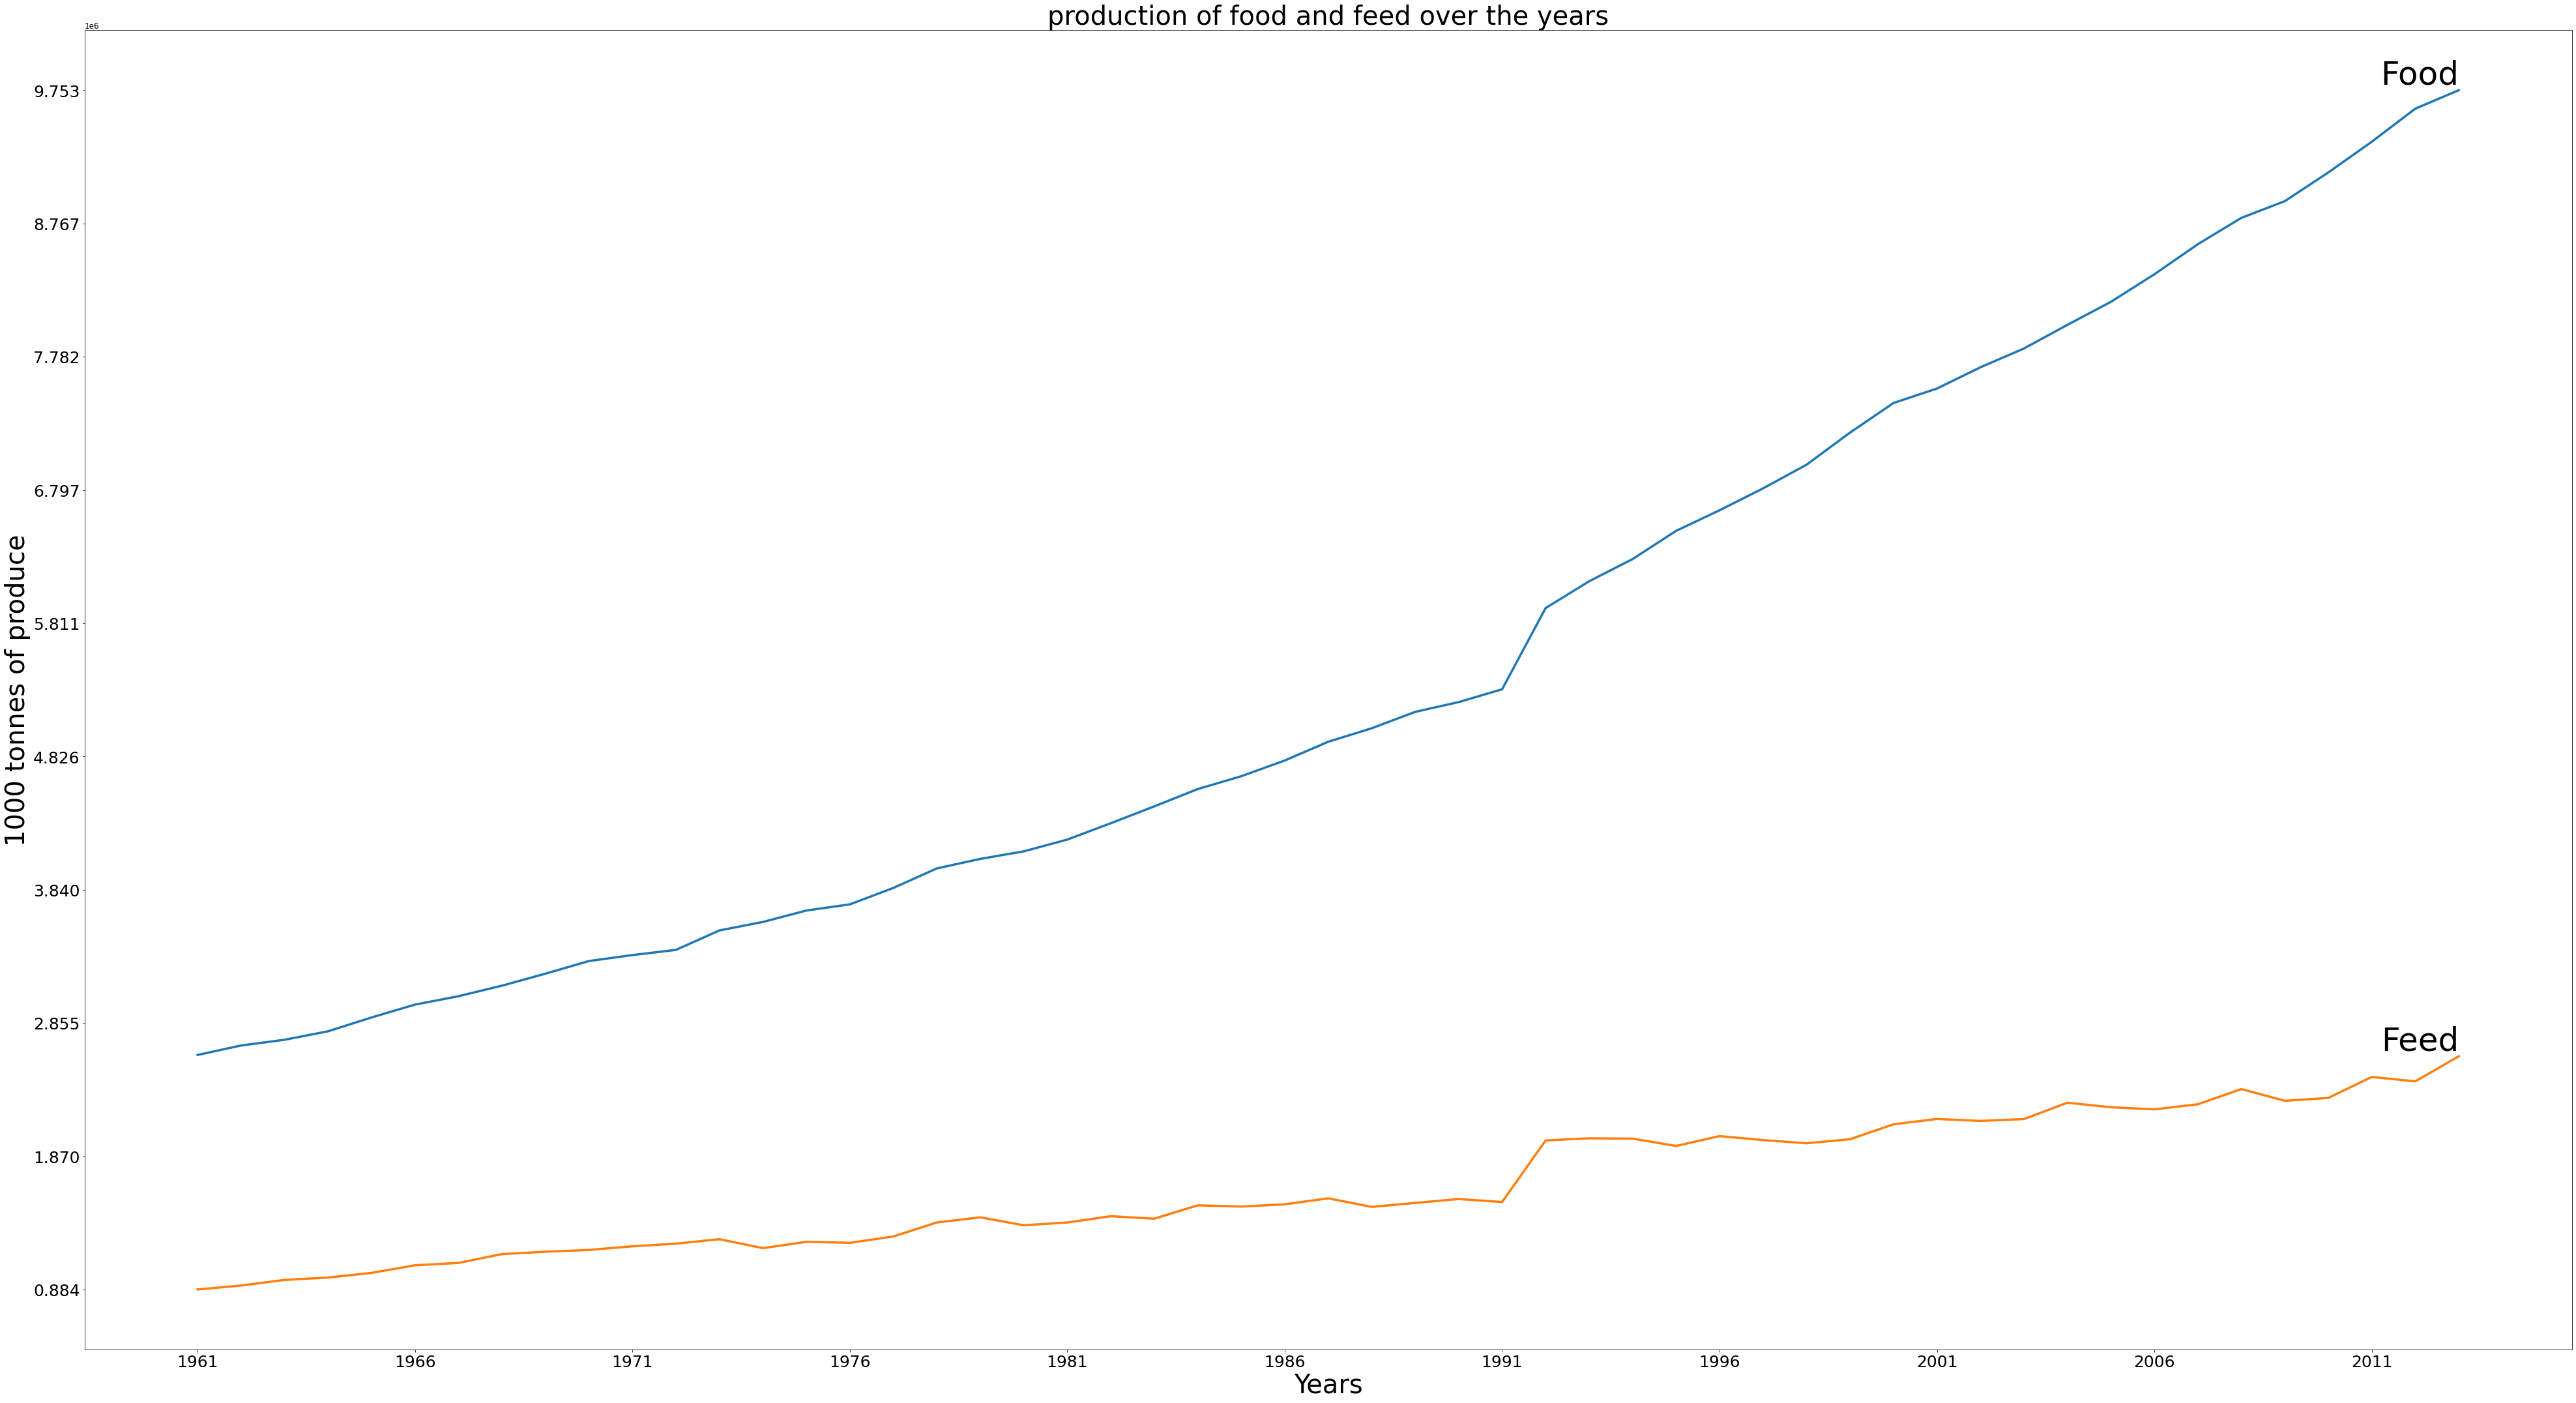

In [8]:
year_numbers = range(1961,2014)     #years in numbers
year_labels = list(food.iloc[:,10:].columns)    #years labels in data set
areas = list(food['Area'].unique())    #unique country labels in data set

#lists of annual food and feed production globally
global_food_production = food[food['Element'] == 'Food'][year_labels].sum()
global_feed_production = food[food['Element'] == 'Feed'][year_labels].sum()

#plotting the production of food and feed over the years
plt.figure(figsize=(55,30))
plt.xticks(year_numbers[::5],fontsize = 25)
plt.yticks(np.linspace(min(global_feed_production), max(global_food_production), 10),fontsize = 25)
plt.xlabel("Years", fontsize=40)
plt.ylabel("1000 tonnes of produce",fontsize=40)
plt.title("production of food and feed over the years",fontsize=40)
plt.text(year_numbers[-1], global_food_production[-1], 'Food', ha='right', va='bottom', fontsize= 50)
plt.text(year_numbers[-1], global_feed_production[-1], 'Feed', ha='right', va='bottom', fontsize= 50)
plt.plot(year_numbers,global_food_production,lw = 3.5)
plt.plot(year_numbers,global_feed_production,lw = 3.5)
save_fig("production of food and feed over the years")
plt.show()

# Does the percentage of food produced affect total production?
## correlation between food production and total production

In [9]:
#food/feed/total production annually for each country
country_food_production = food[food['Element'] == 'Food'].groupby('Area')[year_labels].sum().reset_index()
country_feed_production = food[food['Element'] == 'Feed'].groupby('Area')[year_labels].sum().reset_index()
country_total_production = food.groupby('Area')[year_labels].sum().reset_index()

#food production PERCENTAGE annually for each country
food_production_percentage = country_food_production.copy()
food_production_percentage[year_labels] = country_food_production[year_labels]/(country_feed_production[year_labels]+country_food_production[year_labels])


#transposed total/food production percentage
transposed_total_production = country_total_production.set_index("Area").T
transposed_food_percentage = food_production_percentage.set_index("Area").T

#correlation between food production percentage and total weight of production
production_correlation = transposed_total_production.apply(lambda col: col.corr(transposed_food_percentage[col.name]))
production_correlation = production_correlation.sort_values(ascending=False)

#removing na values
production_correlation.fillna(9, inplace=True)
production_correlation = production_correlation[production_correlation<9]
production_correlation

Area
Sudan           1.000000
Lesotho         0.944936
Vanuatu         0.807331
Brazil          0.796175
South Africa    0.776101
                  ...   
Belgium        -0.967276
Mauritius      -0.968308
Guinea         -0.971652
Czechia        -0.973804
Serbia         -0.982184
Length: 170, dtype: float64

#  Some correlation exists between food production percentage and total production

saving figure correlation between human food production precentage and total production in countries


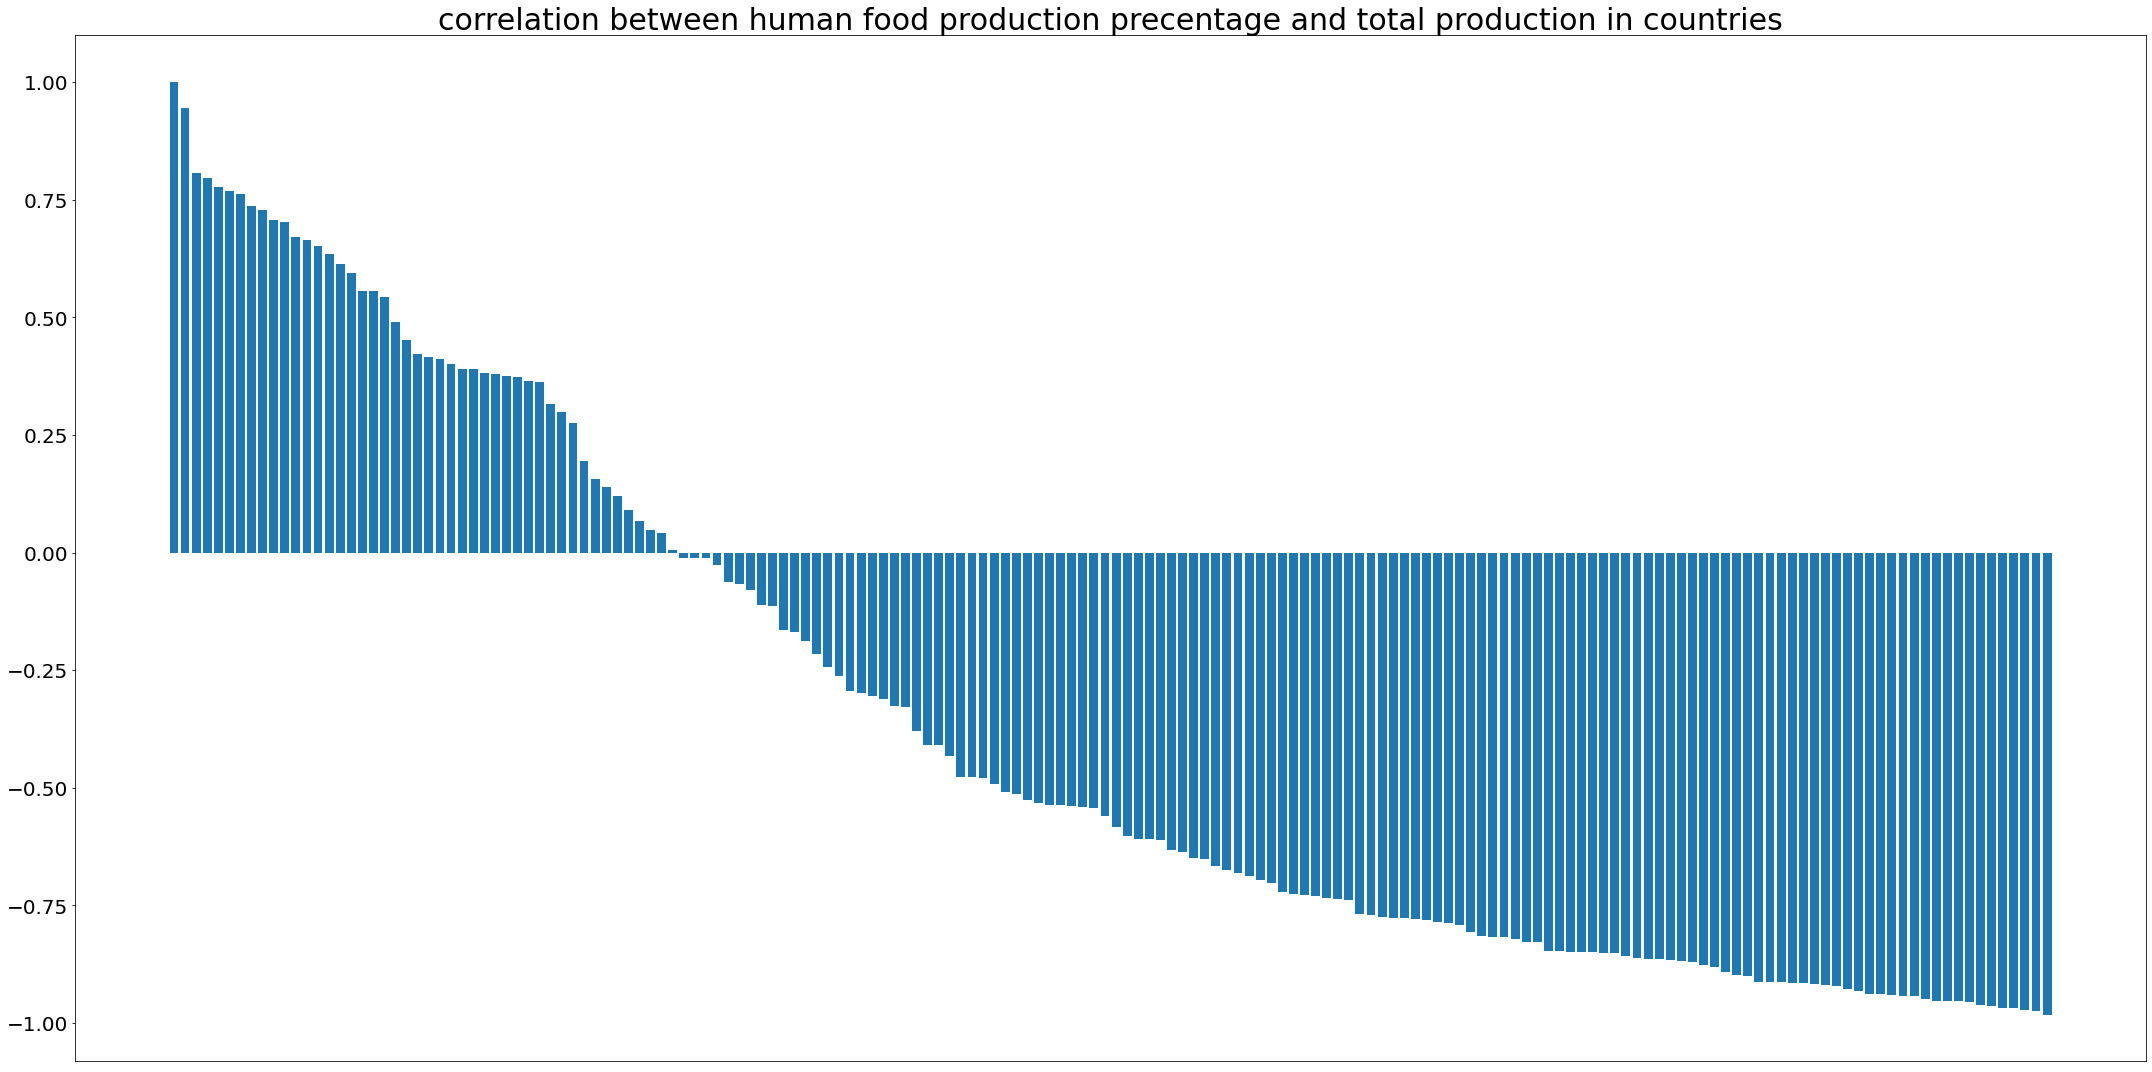

In [10]:
#correlation between human food production precentatge and total production in countries
plt.figure(figsize=(30,15))
plt.yticks(fontsize = 20)
plt.title("correlation between human food production precentage and total production in countries",fontsize=30)
plt.xticks([])
plt.tight_layout()

plt.bar(production_correlation.index,production_correlation.values)
save_fig("correlation between human food production precentage and total production in countries")
plt.show()

# Testing for granger causality between food production percentage and total production

In [11]:
#granger causality tests import
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 3
tests = ['ssr_ftest','ssr_chi2test','lrtest','params_ftest']

results,country_results,correlated_countries = [],[],[]


#tests for granger causality , stores result in "results" , stores tested countries' names in "country_results" 
#and stores non-tested as 'error'
for i in range(0,transposed_food_percentage.shape[1]):
    testframe = pd.DataFrame({'x':transposed_food_percentage.iloc[:,i], 'y':transposed_total_production.iloc[:,i]})
    if testframe.isin([np.nan, np.inf, -np.inf]).any().any() or testframe['x'].nunique() == 1 or testframe['y'].nunique() == 1:
        country_results.append("error")
        continue
    else:
        country_results.append(transposed_food_percentage.columns[i])
        results.append(grangercausalitytests(testframe, max_lag, verbose=False))
        
index = 0  #loops through granger causality test results "results"

#triple nested forloop determines if null hypothesis was rejected for a country
#1st loop through "country_results"
for i in range(0,len(country_results)):
    res_found = 1
    
    #2nd loop through each lag in the granger test
    for x in range(1, max_lag+1):
        #3rd loop through each probability in each lag
        
        for y in range(0,len(tests)):
            
            if country_results[i] == "error":
                res_found = 0 #no granger result
                break
            elif results[index][x][0][tests[y]][1] >= 0.05 : 
                res_found = 1 #result found but null hypo not rejected
                break
            elif results[index][x][0][tests[y]][1] < 0.05 and y == 3:
                res_found = 2 #null hypo rejected
                correlated_countries.append(country_results[i])
        if res_found == 2:
            index+=1
            break
    if res_found == 1:
            index+=1
                         
print(correlated_countries)   

['Albania', 'Angola', 'Austria', 'Bangladesh', 'Benin', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'China, Macao SAR', 'Congo', 'Costa Rica', "C�te d'Ivoire", "Democratic People's Republic of Korea", 'Djibouti', 'Ecuador', 'Egypt', 'Germany', 'Ghana', 'Grenada', 'Guinea', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Myanmar', 'Nepal', 'New Caledonia', 'Nicaragua', 'Niger', 'Panama', 'Philippines', 'Portugal', 'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sierra Leone', 'South Africa', 'Suriname', 'Swaziland', 'Switzerland', 'Togo', 'Tunisia', 'Turkey', 'Uganda', 'United Kingdom', 'United States of America', 'Uruguay', 'Vanu

# Majority of countries' total production isn't granger caused by food production percentage but a significant percentage is.
### Agricultural production is a complex and multifaceted topic correlation between these elements could be attributed to correlation with a third element or more outside of this data set.

saving figure percentage of countries subject to granger causality


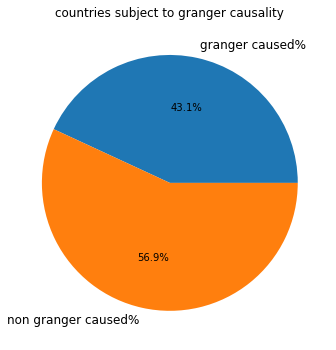

In [12]:
#number of countries subject to granger causality
plt.figure(figsize=(5,5))
plt.title("countries subject to granger causality")
plt.pie([len(correlated_countries),len(areas)-len(correlated_countries)],labels=["granger caused%","non granger caused%"], autopct='%1.1f%%')
save_fig("percentage of countries subject to granger causality")
plt.show();

# How much does a country depend on food production compared to feed production.

saving figure percentage of food production in countries


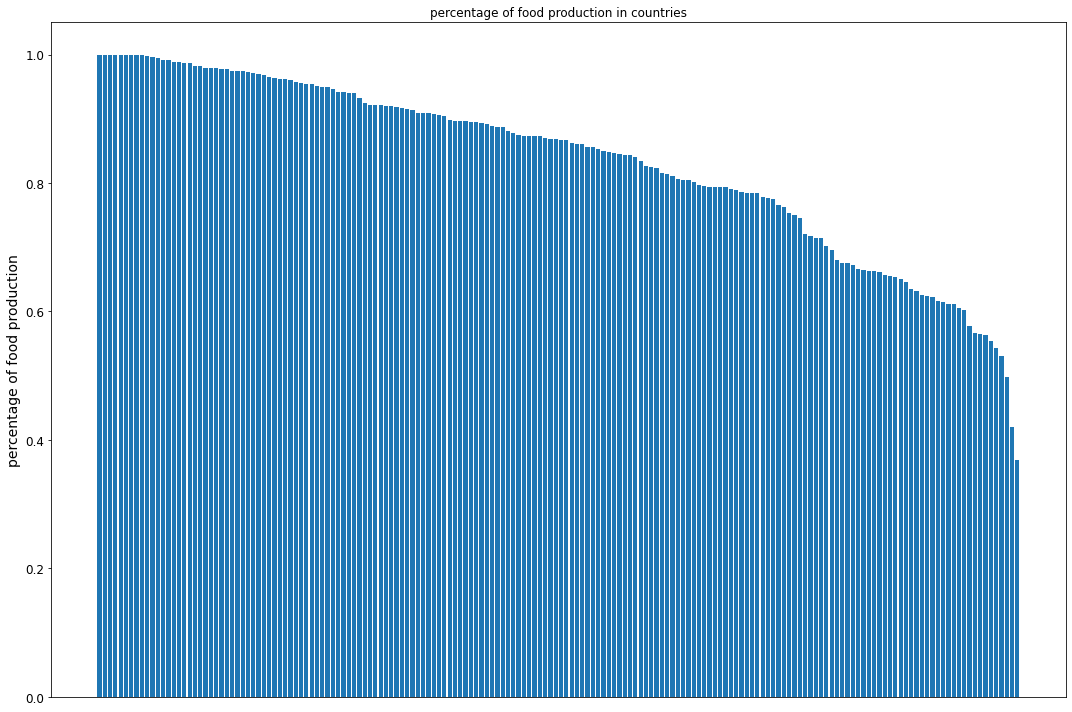

Area
Sao Tome and Principe    1.000000
Solomon Islands          1.000000
Saint Kitts and Nevis    1.000000
Maldives                 1.000000
Rwanda                   0.999982
                           ...   
Paraguay                 0.542566
Hungary                  0.530378
Poland                   0.497342
Belarus                  0.420630
Denmark                  0.368449
Length: 174, dtype: float64


In [24]:
#percentage of food production in countries 
food_dependance = transposed_food_percentage.mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.title("percentage of food production in countries")
plt.ylabel("percentage of food production")
plt.xticks([])
plt.bar(food_dependance.index,food_dependance.values)
save_fig("percentage of food production in countries")
plt.show()
print(food_dependance)

saving figure top and bottom countries in food production percentage


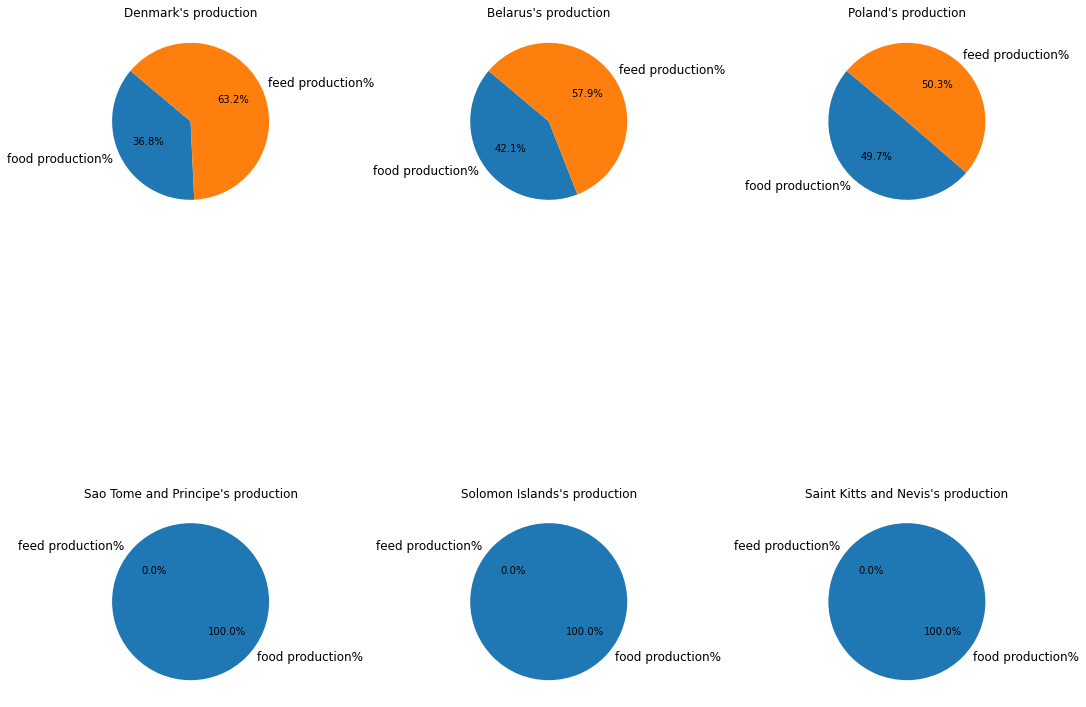

In [14]:
#top and bottom countries in food production percentage 
bottom_indices = (food_dependance.index[:-4:-1])
bottom_values = food_dependance.values[:-4:-1]
top_indices = food_dependance.index[:4]
top_values = food_dependance.values[:4]

plt.figure(figsize=(15,15))

for x in range(0,3):
    plt.subplot(2,3,x+1)
    plt.pie([bottom_values[x],1-bottom_values[x]], labels=["food production%","feed production%"], autopct='%1.1f%%', startangle=140)
    plt.title(bottom_indices[x]+"'s production")
    
    plt.subplot(2,3,x+4)
    plt.pie([top_values[x],1-top_values[x]], labels=["food production%","feed production%"], autopct='%1.1f%%', startangle=140)
    plt.title(top_indices[x]+"'s production")
save_fig("top and bottom countries in food production percentage")
plt.show()

# Which countries produce the most agricultural product.

In [15]:
#leading countries in total agriculture production by weight
leading_producers = country_total_production.copy()
leading_producers["total_production"] = leading_producers[year_labels].sum(axis=1)
leading_producers = leading_producers.sort_values("total_production",ascending=False)
leading_producers["Area"]


35              China, mainland
165    United States of America
73                        India
21                       Brazil
61                      Germany
                 ...           
64                      Grenada
17                      Bermuda
4           Antigua and Barbuda
85                     Kiribati
131       Saint Kitts and Nevis
Name: Area, Length: 174, dtype: object

saving figure leading countries in production
saving figure trailing countries in production


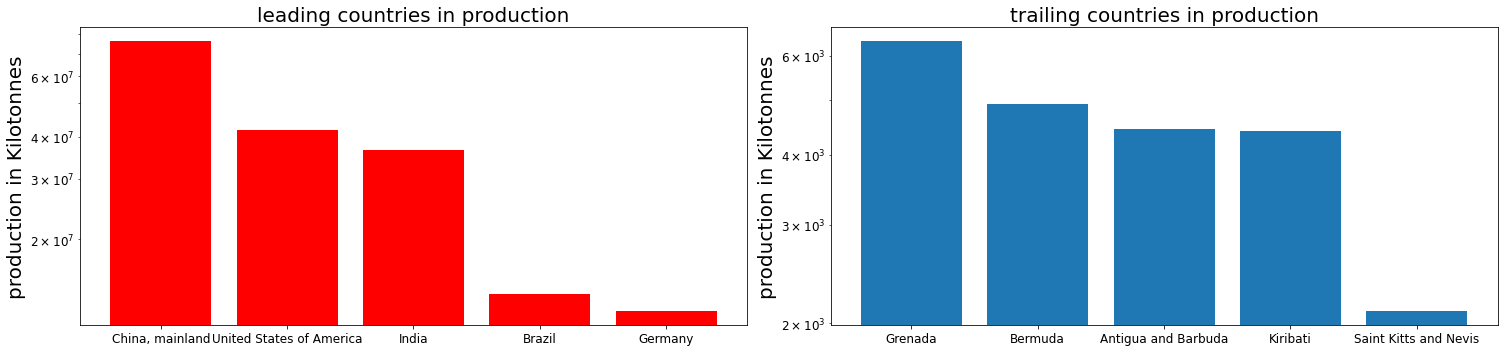

In [16]:
#leading countries in production
plt.figure(figsize=(21,5))
plt.subplot(1,2,1)
plt.ylabel("production in Kilotonnes",fontsize=20)
plt.title("leading countries in production",fontsize=20)
plt.yscale('log')
plt.bar(leading_producers[0:5]["Area"],leading_producers[0:5]["total_production"],color="red")
save_fig("leading countries in production")

#trailing countries in production
plt.subplot(1,2,2)
plt.ylabel("production in Kilotonnes",fontsize=20)
plt.title("trailing countries in production",fontsize=20)
plt.yscale('log')
plt.bar(leading_producers[-5:]["Area"],leading_producers[-5:]["total_production"])
save_fig("trailing countries in production")
plt.tight_layout()
plt.show()

# What are the most produced agricultural products and who produces most of them.

In [17]:
#most produced food/feed items each year
agriculture_product = food.copy()
agriculture_product["Production_sum"] = agriculture_product[year_labels].sum(axis=1)
agriculture_product = agriculture_product.sort_values("Production_sum", ascending=False)
unique_agriculture_product = agriculture_product.groupby(["Item Code","Element","Item"]).sum().sort_values("Production_sum", ascending=False)
unique_agriculture_product.drop(unique_agriculture_product[unique_agriculture_product["Production_sum"]==0].index,inplace=True)

unique_agriculture_product

Area Code  Element Code  latitude  \
Item Code Element Item                                                          
2905      Food    Cereals - Excluding Beer      21825        894708   3376.99   
          Feed    Cereals - Excluding Beer      21753        955133   3365.16   
2918      Food    Vegetables                    21825        894708   3376.99   
2848      Food    Milk - Excluding Butter       21825        894708   3376.99   
2948      Food    Milk - Excluding Butter       21825        894708   3376.99   
...                                               ...           ...       ...   
2561      Feed    Sesame seed                     697         33126    305.08   
2559      Food    Cottonseed                      105          5142     31.05   
2562      Feed    Palm kernels                   1113         38647    303.34   
2586      Feed    Oilcrops Oil, Other             537         16563    152.09   
2580      Feed    Olive Oil                       343         22084    102.48   

                                            longitude     Y1961     Y1962  \
Item Code Element Item                                                      
2905      Food    Cereals - Excluding Beer    2742.31  334989.0  350885.0   
          Feed    Cereals - Excluding Beer    2699.72  253905.0  260940.0   
2918      Food    Vegetables                  2742.31  174230.0  174611.0   
2848      Food    Milk - Excluding Butter     2742.31  188061.0  189402.0   
2948      Food    Milk - Excluding Butter     2742.31  188061.0  189402.0   
...                                               ...       ...       ...   
2561      Feed    Sesame seed                  249.70       0.0       0.0   
2559      Food    Cottonseed                    34.85       0.0       0.0   
2562      Feed    Palm kernels                 286.72       0.0       0.0   
2586      Feed    Oilcrops Oil, Other           61.76       0.0       0.0   
2580      Feed    Olive Oil                    277.95       0.0       0.0   

                                               Y1963     Y1964     Y1965  \
Item Code Element Item                                                     
2905      Food    Cereals - Excluding Beer  360495.0  377175.0  385213.0   
          Feed    Cereals - Excluding Beer  269992.0  274227.0  297391.0   
2918      Food    Vegetables                175060.0  172677.0  177969.0   
2848      Food    Milk - Excluding Butter   194676.0  197726.0  200428.0   
2948      Food    Milk - Excluding Butter   194676.0  197726.0  200428.0   
...                                              ...       ...       ...   
2561      Feed    Sesame seed                    0.0       0.0       0.0   
2559      Food    Cottonseed                     0.0       0.0       0.0   
2562      Feed    Palm kernels                   0.0       0.0       0.0   
2586      Feed    Oilcrops Oil, Other            0.0       0.0       0.0   
2580      Feed    Olive Oil                      0.0       0.0       0.0   

                                               Y1966  ...     Y2005     Y2006  \
Item Code Element Item                                ...                       
2905      Food    Cereals - Excluding Beer  397924.0  ...  928890.0  942238.0   
          Feed    Cereals - Excluding Beer  310857.0  ...  745239.0  736469.0   
2918      Food    Vegetables                183722.0  ...  773213.0  804133.0   
2848      Food    Milk - Excluding Butter   205903.0  ...  524056.0  540888.0   
2948      Food    Milk - Excluding Butter   205903.0  ...  524056.0  540888.0   
...                                              ...  ...       ...       ...   
2561      Feed    Sesame seed                    0.0  ...       1.0       1.0   
2559      Food    Cottonseed                     0.0  ...       0.0       0.0   
2562      Feed    Palm kernels                   0.0  ...       0.0       0.0   
2586      Feed    Oilcrops Oil, Other            0.0  ...       0.0       0.0   
2580      Feed    Olive Oil

In [18]:
#most produced item in a year
most_produced_types = unique_agriculture_product[year_labels].idxmax()
most_produced_types.unique()

array([(2905, 'Food', 'Cereals - Excluding Beer')], dtype=object)

saving figure total production of the most produced items from 1961 to 2013


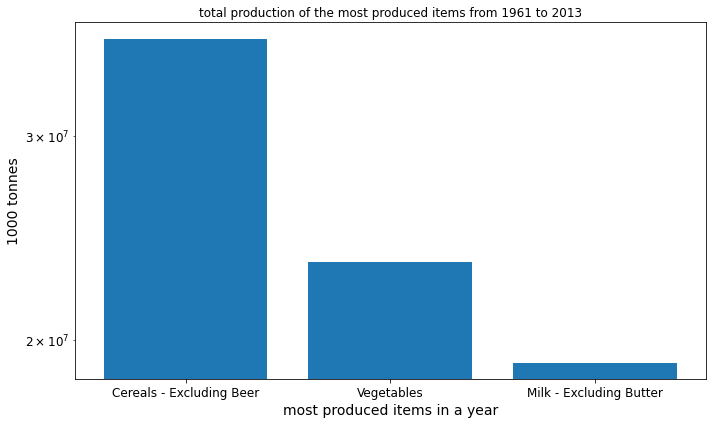

In [26]:
#most produced item in a year
plt.figure(figsize=(10,6))
plt.yscale("log")
plt.ylabel("1000 tonnes")
plt.xlabel("most produced items in a year")
plt.title("total production of the most produced items from 1961 to 2013")
plt.bar(unique_agriculture_product[:5].index.get_level_values(2),unique_agriculture_product["Production_sum"][:5].values)
save_fig("total production of the most produced items from 1961 to 2013")
plt.show();

saving figure China's production of Cereals - Excluding Beer from 1961 to 2013


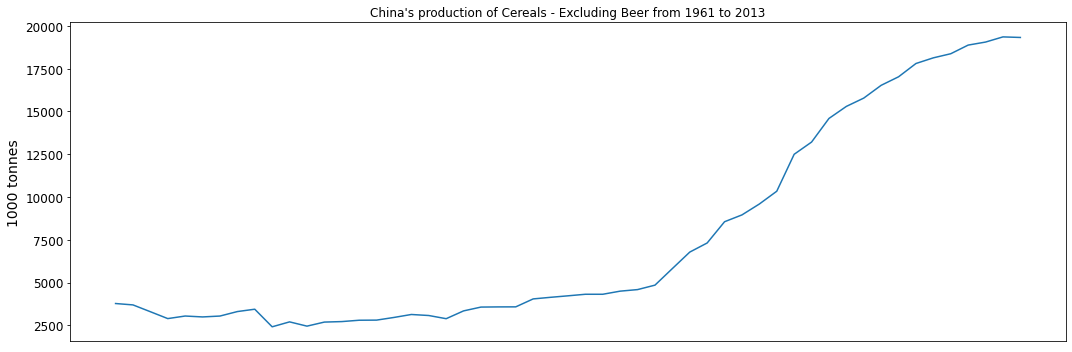

array(['China, mainland'], dtype=object)

In [27]:
#countries that produce the most of the most produced items
most_producing_country_annually = food.iloc[food[(food["Item Code"]==2602) & (food["Element"]=="Food")][year_labels].idxmax()]
plt.figure(figsize=(15,5))
plt.xticks([])
plt.ylabel("1000 tonnes")
plt.title("China's production of Cereals - Excluding Beer from 1961 to 2013")
plt.plot(most_producing_country_annually[year_labels].max(axis=0))
save_fig("China's production of Cereals - Excluding Beer from 1961 to 2013")
plt.show();
most_producing_country_annually["Area"].unique()

In [21]:
#least produced items in a year
least_produced_types = unique_agriculture_product[year_labels].idxmin()
least_produced_types.unique()

array([(2574, 'Feed', 'Rape and Mustard Oil'), (2602, 'Feed', 'Onions'),
       (2731, 'Feed', 'Bovine Meat'), (2766, 'Feed', 'Cephalopods'),
       (2765, 'Feed', 'Crustaceans'), (2537, 'Food', 'Sugar beet'),
       (2561, 'Feed', 'Sesame seed'), (2559, 'Food', 'Cottonseed'),
       (2734, 'Feed', 'Poultry Meat'), (2740, 'Feed', 'Butter, Ghee'),
       (2922, 'Feed', 'Stimulants'), (2782, 'Food', 'Fish, Liver Oil')],
      dtype=object)

saving figure total production of the least produced items from 1961 to 2013


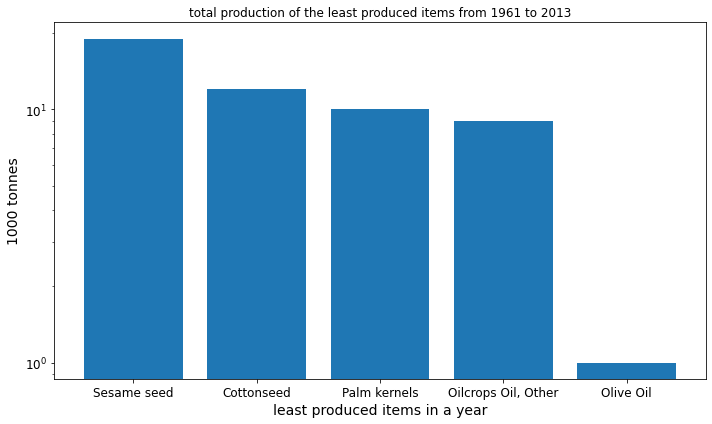

In [28]:
plt.figure(figsize=(10,6))
plt.yscale("log")
plt.ylabel("1000 tonnes")
plt.xlabel("least produced items in a year")
plt.title("total production of the least produced items from 1961 to 2013")
plt.bar(unique_agriculture_product[-5:].index.get_level_values(2),unique_agriculture_product["Production_sum"][-5:].values)
save_fig("total production of the least produced items from 1961 to 2013")
plt.show();

saving figure production of Sugar beet from 1961 to 2013


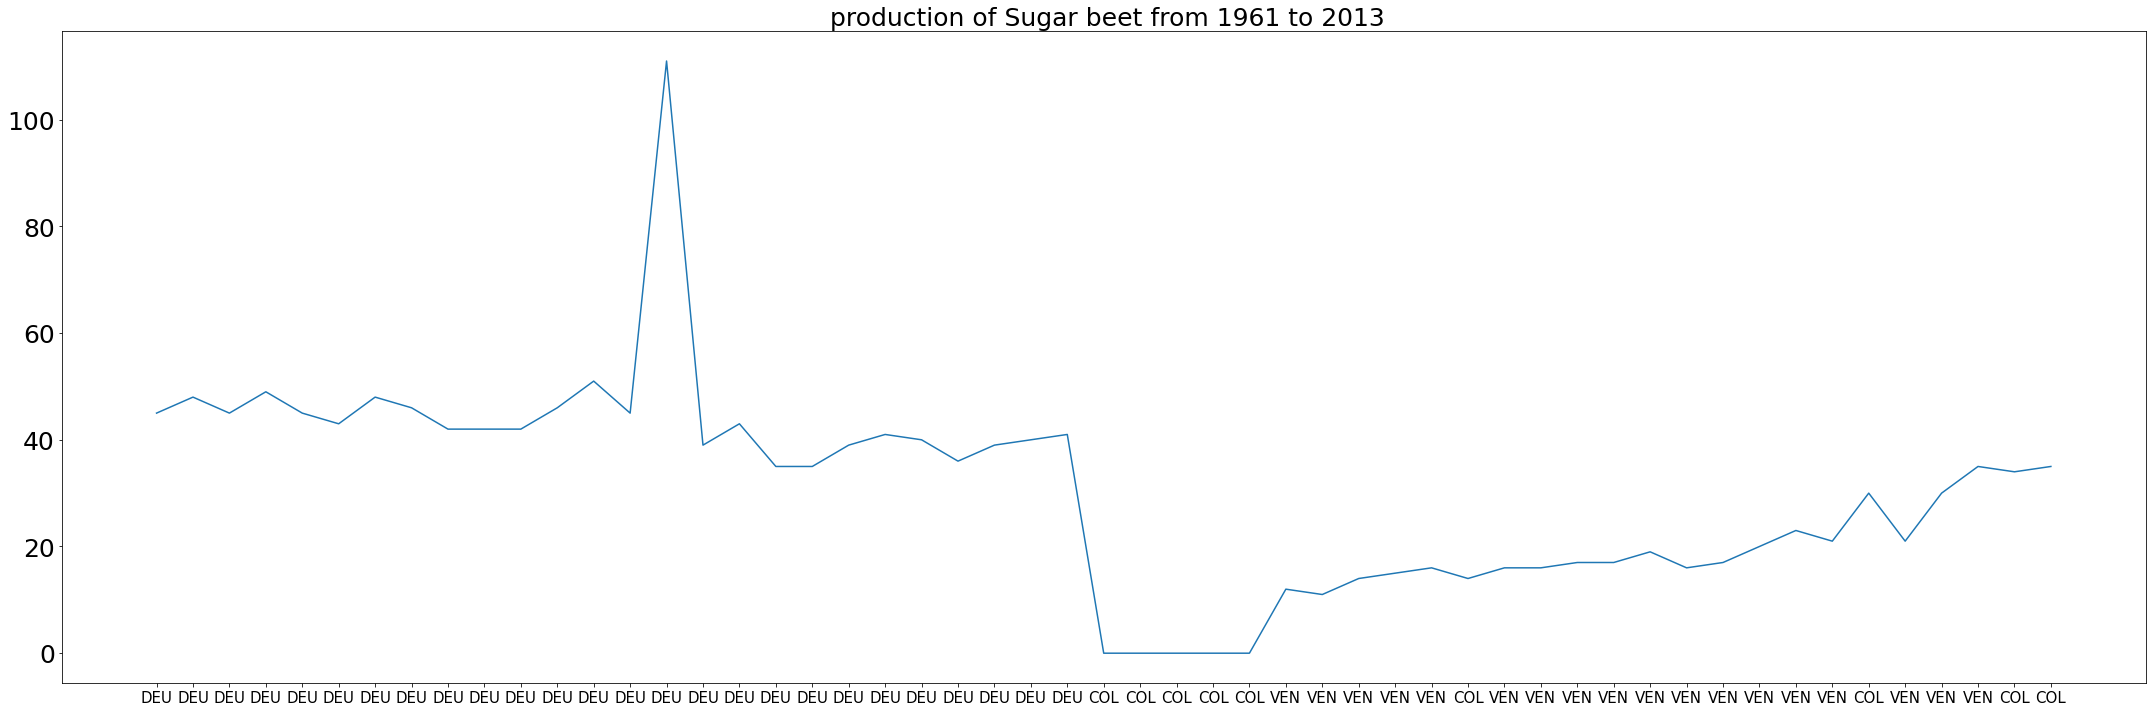

array(['Germany', 'Colombia', 'Venezuela (Bolivarian Republic of)'],
      dtype=object)

In [23]:
#countries that produce the most of the least produced items
most_producing_country_annually = food.iloc[food[(food["Item Code"]==2537) & (food["Element"]=="Food")][year_labels].idxmax()]
plt.figure(figsize=(30,10))
plt.xticks(range(len(most_producing_country_annually["Area Abbreviation"].values)),most_producing_country_annually["Area Abbreviation"].values,fontsize=15)
plt.yticks(fontsize=25)
plt.title(" production of Sugar beet from 1961 to 2013",fontsize=25)
plt.plot(most_producing_country_annually[year_labels].max(axis=0))
save_fig("production of Sugar beet from 1961 to 2013")
plt.show();
most_producing_country_annually["Area"].unique()